In [30]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.serialize import model_to_json, model_from_json
from prophet.diagnostics import cross_validation

In [68]:
sao_goncalo_data = pd.read_csv("data/data.csv")

sao_goncalo_data = sao_goncalo_data[sao_goncalo_data['Rio'] != 'lagoa dos patos']

sao_goncalo_data['ds'] = pd.to_datetime(sao_goncalo_data['ds'],format="%d/%m/%Y %H:%M:%S")

#sao_goncalo_data['ds'] = sao_goncalo_data['ds'].dt.strftime("%d/%m/%Y %H:%M:%S")

In [69]:
sao_goncalo_data.tail()

,ds,Rio,y
121,2024-05-14 16:00:00,sao goncalo,2.68
122,2024-05-14 17:00:00,sao goncalo,2.70
123,2024-05-14 18:00:00,sao goncalo,2.72
124,2024-05-14 19:00:00,sao goncalo,2.72
125,2024-05-14 21:00:00,sao goncalo,2.76


In [72]:
pos_wind = pd.read_csv("data/wind.csv")

pos_wind['ds'] = pd.to_datetime(pos_wind['ds'], format="%d/%m/%Y %H:%M:%S")

#pos_wind['ds'] = pos_wind['ds'].dt.strftime("%d/%m/%Y %H:%M:%S")

sao_goncalo_data = pd.merge(sao_goncalo_data, pos_wind, on="ds")

/tmp/ipykernel_15414/3519546691.py:3: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



In [73]:
pos_wind.head()

,ds,pos_wind
0,2024-05-04 14:00:00,126
1,2024-05-04 20:00:00,82
2,2024-05-05 15:00:00,112
3,2024-05-05 20:00:00,82
4,2024-05-06 09:00:00,45


In [74]:
sao_goncalo_data.tail(50)

,ds,Rio,y,pos_wind
47,2024-05-11 15:00:00,sao goncalo,2.72,160
48,2024-05-11 16:00:00,sao goncalo,2.74,152
49,2024-05-11 17:00:00,sao goncalo,2.74,173
50,2024-05-11 19:00:00,sao goncalo,2.76,159
51,2024-05-11 20:00:00,sao goncalo,2.76,146
52,2024-05-11 21:00:00,sao goncalo,2.76,137
53,2024-05-11 22:00:00,sao goncalo,2.78,130
54,2024-05-12 00:00:00,sao goncalo,2.77,110
55,2024-05-12 01:00:00,sao goncalo,2.78,133
56,2024-05-12 03:00:00,sao goncalo,2.78,123


22:23:32 - cmdstanpy - INFO - Chain [1] start processing
22:23:32 - cmdstanpy - INFO - Chain [1] done processing


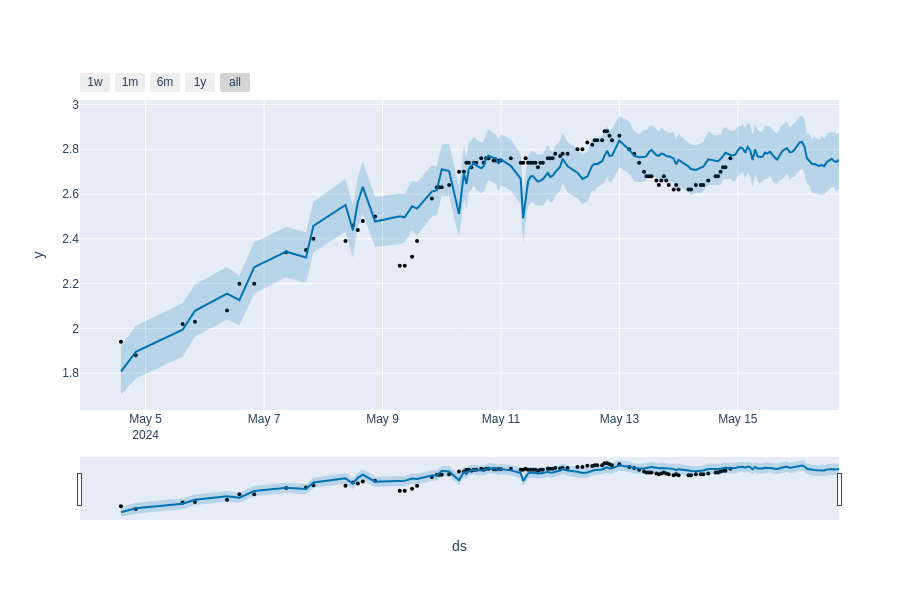

In [76]:
m = Prophet(
    yearly_seasonality=False,  
    weekly_seasonality=False,  
    daily_seasonality=True,    
    changepoint_range=0.8,     
    changepoint_prior_scale=0.75,
    changepoints=['2024-05-09 04:00:00'],
    growth="linear"         
)

# Defina os pontos de mudança
m.add_seasonality(name='daily', period=1, fourier_order=9, prior_scale = 0.01)
m.add_regressor("pos_wind", mode = "multiplicative", prior_scale = 0.8)

# Ajuste o modelo
m.fit(sao_goncalo_data)

# Realize previsões
future = m.make_future_dataframe(periods=44, freq='h')  

future['pos_wind'] = pos_wind['pos_wind']

forecast = m.predict(future)

# Visualize o resultado do modelo
plot_plotly(m, forecast)

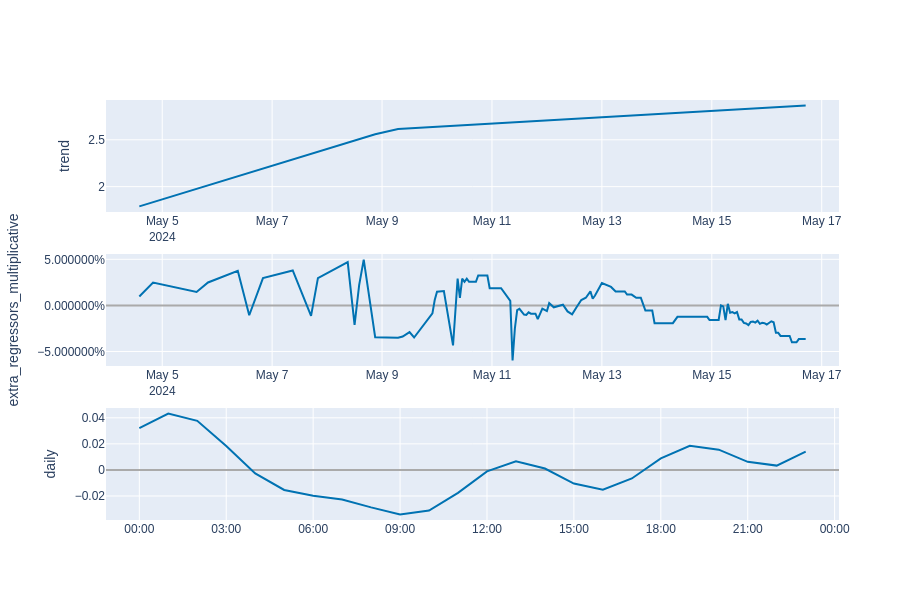

In [77]:
plot_components_plotly(m, forecast)

In [78]:
df_cv = cross_validation(m, initial='2 hour', period='15 hour', horizon = '6 hour')
df_cv.head()

Seasonality has period of 1 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/13 [00:00<?, ?it/s]

22:23:34 - cmdstanpy - INFO - Chain [1] start processing
22:23:35 - cmdstanpy - INFO - Chain [1] done processing
22:23:35 - cmdstanpy - INFO - Chain [1] start processing
22:23:38 - cmdstanpy - INFO - Chain [1] done processing
22:23:38 - cmdstanpy - INFO - Chain [1] start processing
22:23:38 - cmdstanpy - INFO - Chain [1] done processing
22:23:38 - cmdstanpy - INFO - Chain [1] start processing
22:23:38 - cmdstanpy - INFO - Chain [1] done processing
22:23:38 - cmdstanpy - INFO - Chain [1] start processing
22:23:38 - cmdstanpy - INFO - Chain [1] done processing
22:23:38 - cmdstanpy - INFO - Chain [1] start processing
22:23:38 - cmdstanpy - INFO - Chain [1] done processing
22:23:38 - cmdstanpy - INFO - Chain [1] start processing
22:23:38 - cmdstanpy - INFO - Chain [1] done processing
22:23:38 - cmdstanpy - INFO - Chain [1] start processing
22:23:38 - cmdstanpy - INFO - Chain [1] done processing
22:23:38 - cmdstanpy - INFO - Chain [1] start processing
22:23:38 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-05-05 15:00:00,7.872008,7.872008,7.872008,2.02,2024-05-05 14:00:00
1,2024-05-05 20:00:00,1.753526,1.753526,1.753526,2.03,2024-05-05 14:00:00
2,2024-05-06 20:00:00,2.187013,2.187013,2.187013,2.20,2024-05-06 14:00:00
3,2024-05-07 17:00:00,-1.087497,-1.095240,-1.079968,2.35,2024-05-07 14:00:00
4,2024-05-07 20:00:00,2.399237,2.391740,2.407128,2.40,2024-05-07 14:00:00


In [80]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 01:00:00,4.308703,2.075741,0.837376,0.401327,0.028798,0.188328,0.500000
1,0 days 02:00:00,0.012568,0.112109,0.085316,0.031516,0.021089,0.030679,0.600000
2,0 days 03:00:00,1.708850,1.307230,0.604628,0.250845,0.044941,0.327748,0.285714
3,0 days 04:00:00,0.027090,0.164590,0.150858,0.055904,0.059033,0.055022,0.166667
4,0 days 05:00:00,0.058639,0.242154,0.220963,0.083653,0.073260,0.086281,0.000000


/home/dell/anaconda3/envs/flood-rs/lib/python3.12/site-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/home/dell/anaconda3/envs/flood-rs/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



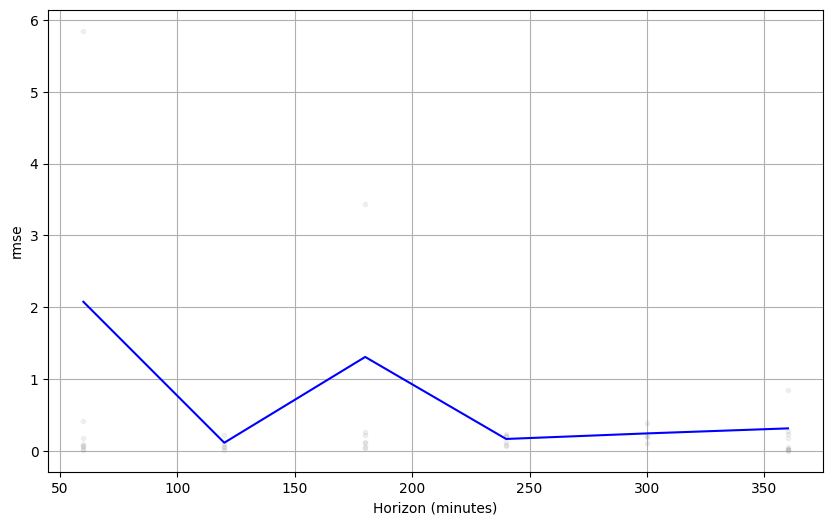

In [81]:
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [82]:
with open('data/serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))